# Task 1

### Importing data to jupyter notebook

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BioData2021 = pd.read_excel(r"C:\Users\Radia Jannat (RJay)\Desktop\ENDG319_CURE_Deliverable_4\BioData2021.xlsx")
BioData2021;

In [3]:
BioData2021_Organised = BioData2021.sort_values('Gender')
BioData2021_Organised;

In [4]:
BioData2021_Organised['Vaccinated'] = np.where(BioData2021['Vaccinated']=="Yes",'1','0')
BioData2021_Organised;

In [5]:
BioData2021_Organised['Class'] = np.where(BioData2021['Class']=="Positive",'1','0')
BioData2021_Organised;

In [6]:
asorted = BioData2021_Organised.sort_values('Class',ignore_index=True)
asorted;

### Seperating class from attributes

In [35]:
data = asorted.drop(columns=["Eye Color", "BloodType", "Gender", "Class"])
sy = asorted.Class
data

,Age,Height(cm),Weight,Vaccinated
0,24,252,65,1
1,22,193,67,0
2,23,181,53,1
3,24,272,54,1
4,23,185,119,0
...,...,...,...,...
95,23,273,105,0
96,24,172,91,1
97,19,241,64,0
98,18,205,108,1


### Training and test sets

In [8]:
from sklearn.model_selection import train_test_split

data_train, data_test, sy_train, sy_test = train_test_split(data,sy)

In [9]:
data_train, data_test, sy_train, sy_test;

### Making sure all data is numerical

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le

LabelEncoder()

In [11]:
le = le.fit(sy_train)
le.classes_

array(['0', '1'], dtype=object)

In [12]:
y_train = le.transform(sy_train)
sy_train, y_train;

In [13]:
y_test = le.transform(sy_test)
sy_test, y_test;

In [14]:
data_train.to_numpy();

# Task 2

### MinMaxScaler used for attribute preprocessing 

In [15]:
n1=preprocessing.MinMaxScaler()
n1=n1.fit(data_train.to_numpy())
n1x_train=n1.transform(data_train.to_numpy())
n1x_train;

In [16]:
n1 = preprocessing.MinMaxScaler()
n1 = n1.fit(data_test.to_numpy())
n1x_test = n1.transform(data_test.to_numpy())
n1x_test;

### StandardScaler used for attribute preprocessing 

In [17]:
n2=preprocessing.StandardScaler()
n2=n2.fit(data_train.to_numpy())
n2x_train=n2.transform(data_train.to_numpy())
n2x_train;

In [18]:
n2=preprocessing.StandardScaler()
n2=n2.fit(data_test.to_numpy())
n2x_test=n2.transform(data_test.to_numpy())
n2x_test;

### Using KNN classifier

In [19]:
n1x_train.shape

(75, 4)

In [20]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=1)
knn = knn.fit(data_train,sy_train)
knn

KNeighborsClassifier(n_neighbors=1)

### Model accuracy for train and test data sets

In [21]:
knn.score(data_train,sy_train)

1.0

In [22]:
knn.score(data_test,sy_test)

0.52

### Data for model accuracy with different k values

In [23]:
for i in range(1, data_train.shape[0]):
    knn = KNN(n_neighbors=i)
    knn = knn.fit(data_train,sy_train)

In [24]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model_accuracy = df();
for i in range(1, n1x_train.shape[0]):
    knn = KNN(n_neighbors=i)
    knn = knn.fit(n1x_train,sy_train)
    model_accuracy.at[i,'i'] = i
    model_accuracy.at[i,'n1x_test'] = knn.score(n1x_test,sy_test)
    model_accuracy.at[i,'n1x_train'] = knn.score(n1x_train,sy_train)
    
for i in range(1, n2x_train.shape[0]):
    knn = KNN(n_neighbors=i)
    knn = knn.fit(n2x_train,sy_train)
    model_accuracy.at[i,'n2x_test'] = knn.score(n2x_test,sy_test)
    model_accuracy.at[i,'n2x_train'] = knn.score(n2x_train,sy_train)
    
model_accuracy

,i,n1x_test,n1x_train,n2x_test,n2x_train
1,1.0,0.60,1.000000,0.48,1.000000
2,2.0,0.48,0.800000,0.52,0.800000
3,3.0,0.64,0.746667,0.52,0.746667
4,4.0,0.64,0.600000,0.52,0.600000
5,5.0,0.60,0.706667,0.60,0.706667
...,...,...,...,...,...
70,70.0,0.52,0.493333,0.40,0.493333
71,71.0,0.60,0.493333,0.48,0.506667
72,72.0,0.44,0.520000,0.44,0.520000
73,73.0,0.44,0.520000,0.44,0.520000


### Graph for 'KValue vs MinMax Scaler Data' 

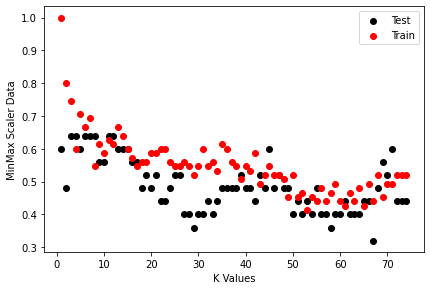

In [33]:
import matplotlib.pyplot as plt

fg, axs1 = plt.subplots()
plt.tight_layout()

axs1.scatter(model_accuracy['i'],model_accuracy['n1x_test'],label='Test', c='black')
axs1.scatter(model_accuracy['i'],model_accuracy['n1x_train'],label='Train', c='r')
axs1.set_xlabel('K Values')
axs1.set_ylabel('MinMax Scaler Data')
axs1.legend()

### Graph for 'KValue vs Standard Scaler Data' 

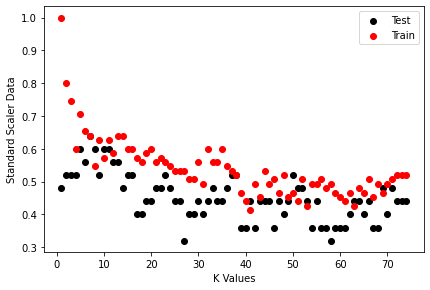

In [34]:
import matplotlib.pyplot as plt

fg, axs2 = plt.subplots()
plt.tight_layout()

axs2.scatter(model_accuracy['i'],model_accuracy['n2x_test'],label='Test', c='black')
axs2.scatter(model_accuracy['i'],model_accuracy['n2x_train'],label='Train', c='r')
axs2.set_xlabel('K Values')
axs2.set_ylabel('Standard Scaler Data')
axs2.legend()

# Task 3

### Selecting best K Value

In [27]:
test_scrs=model_accuracy["n1x_test"]
test_scrs = test_scrs.append(model_accuracy["n2x_test"])
test_scrs

1     0.60
2     0.48
3     0.64
4     0.64
5     0.60
      ... 
70    0.40
71    0.48
72    0.44
73    0.44
74    0.44
Length: 148, dtype: float64

In [28]:
max_index = test_scrs.idxmax()
max_index

3

### Making confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

knn = KNN(n_neighbors=max_index) 
knn = knn.fit(n1x_train,sy_train)
knn = knn.predict(n1x_test)
confusion_matrix(sy_test,knn)

array([[8, 3],
       [6, 8]], dtype=int64)

# Task 4

In [30]:
new_example = np.array([  [26, 172, 76, 1]  ])
x_new = n1.transform(new_example)
x_new

array([[1.14285714, 0.01234568, 0.3968254 , 1.        ]])

In [31]:
knn = KNN(n_neighbors=1)
knn = knn.fit(data_train, sy_train)
knn.predict(x_new)

array(['1'], dtype=object)